In [21]:
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt

#ignore
import warnings
warnings.filterwarnings('ignore')

# DL Libraries

import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.optimizers import RMSprop # type: ignore
from keras.applications.vgg16 import VGG16


#other util libraries
import os

In [22]:
data_dir = 'data_dir'
test_dir = 'test_dir'

print("data dir exists: ", os.path.exists(data_dir))
print("test_dir exists: ", os.path.exists(test_dir))

data dir exists:  True
test_dir exists:  True


In [23]:
batchSize = 32

trainDataGen = ImageDataGenerator(
    rescale= 1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    #width_shift_range = 0.2,
    #height_shift_range = -0.5,
    validation_split=0.2
)

testDataGen = ImageDataGenerator(rescale=1/255)




In [24]:
trainData = trainDataGen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size = batchSize,
    class_mode = 'binary',
    subset = 'training'
)

validData = trainDataGen.flow_from_directory(
    data_dir,
    target_size=(224,224),
    batch_size = 1,
    class_mode = 'binary',
    subset = 'validation'
)

testData = testDataGen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size = batchSize,
    class_mode = 'binary'
)



Found 1500 images belonging to 2 classes.
Found 374 images belonging to 2 classes.
Found 3232 images belonging to 2 classes.


In [25]:
classes = trainData.class_indices
print(f'class indices: ', classes)

class indices:  {'humans': 0, 'nothing': 1}


In [26]:
convBase = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

In [27]:
convBase.trainable = False

model = Sequential()

model.add(convBase)
model.add(BatchNormalization())

model.add(Flatten())

#dense layer with 264 neurons
model.add(Dense(264, activation='relu')) 

model.add(Dropout(0.35))
model.add(BatchNormalization())

# Dense layer with 64 neurons
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())

# Dense layer with 1 units (output layer)
# Input size: 64, Output size: 1
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer= RMSprop(learning_rate=0.001, rho = 0.9, epsilon=1e-07), 
    loss ='binary_crossentropy', 
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization_3 (Bat  (None, 7, 7, 512)         2048      
 chNormalization)                                                
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 264)               6623496   
                                                                 
 dropout_2 (Dropout)         (None, 264)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 264)               1056      
 chNormalization)                                     

In [28]:

classWeight = compute_class_weight('balanced', classes = np.unique(trainData.classes), y = trainData.classes)
classWeight =   dict(enumerate(classWeight))
print(classWeight)

{0: 0.7455268389662028, 1: 1.5182186234817814}


In [29]:


history = model.fit(
    trainData,
    epochs = 50,
    validation_data = validData,
    class_weight = classWeight
)

Epoch 1/50
47/47 [==============================] - 102s 2s/step - loss: 0.2145 - accuracy: 0.9093 - val_loss: 0.1671 - val_accuracy: 0.9358
Epoch 2/50
47/47 [==============================] - 106s 2s/step - loss: 0.0926 - accuracy: 0.9667 - val_loss: 0.1567 - val_accuracy: 0.9305
Epoch 3/50
47/47 [==============================] - 106s 2s/step - loss: 0.0500 - accuracy: 0.9860 - val_loss: 0.1036 - val_accuracy: 0.9545
Epoch 4/50
47/47 [==============================] - 103s 2s/step - loss: 0.0346 - accuracy: 0.9880 - val_loss: 0.1037 - val_accuracy: 0.9652
Epoch 5/50
47/47 [==============================] - 113s 2s/step - loss: 0.0310 - accuracy: 0.9920 - val_loss: 0.1061 - val_accuracy: 0.9652
Epoch 6/50
47/47 [==============================] - 124s 3s/step - loss: 0.0280 - accuracy: 0.9920 - val_loss: 0.1294 - val_accuracy: 0.9652
Epoch 7/50
47/47 [==============================] - 125s 3s/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0804 - val_accuracy: 0.9706
Epoch 8/50
47

In [30]:
loss, accuracy = model.evaluate(validData)

374/374 [==============================] - 26s 70ms/step - loss: 0.1505 - accuracy: 0.9759


0.0
1/1 [==============================] - 0s 202ms/step
0.0
1/1 [==============================] - 0s 74ms/step
0.0
1/1 [==============================] - 0s 67ms/step
0.0
1/1 [==============================] - 0s 75ms/step
0.0
1/1 [==============================] - 0s 68ms/step
1.0
1/1 [==============================] - 0s 76ms/step
0.0
1/1 [==============================] - 0s 75ms/step
0.0
1/1 [==============================] - 0s 76ms/step
0.0
1/1 [==============================] - 0s 84ms/step
1.0
1/1 [==============================] - 0s 75ms/step
0.0
1/1 [==============================] - 0s 76ms/step
0.0
1/1 [==============================] - 0s 76ms/step
0.0
1/1 [==============================] - 0s 84ms/step
0.0
1/1 [==============================] - 0s 75ms/step
1.0
1/1 [==============================] - 0s 76ms/step
0.0
1/1 [==============================] - 0s 75ms/step
0.0
1/1 [==============================] - 0s 75ms/step
0.0
1/1 [==============================] - 0s 7

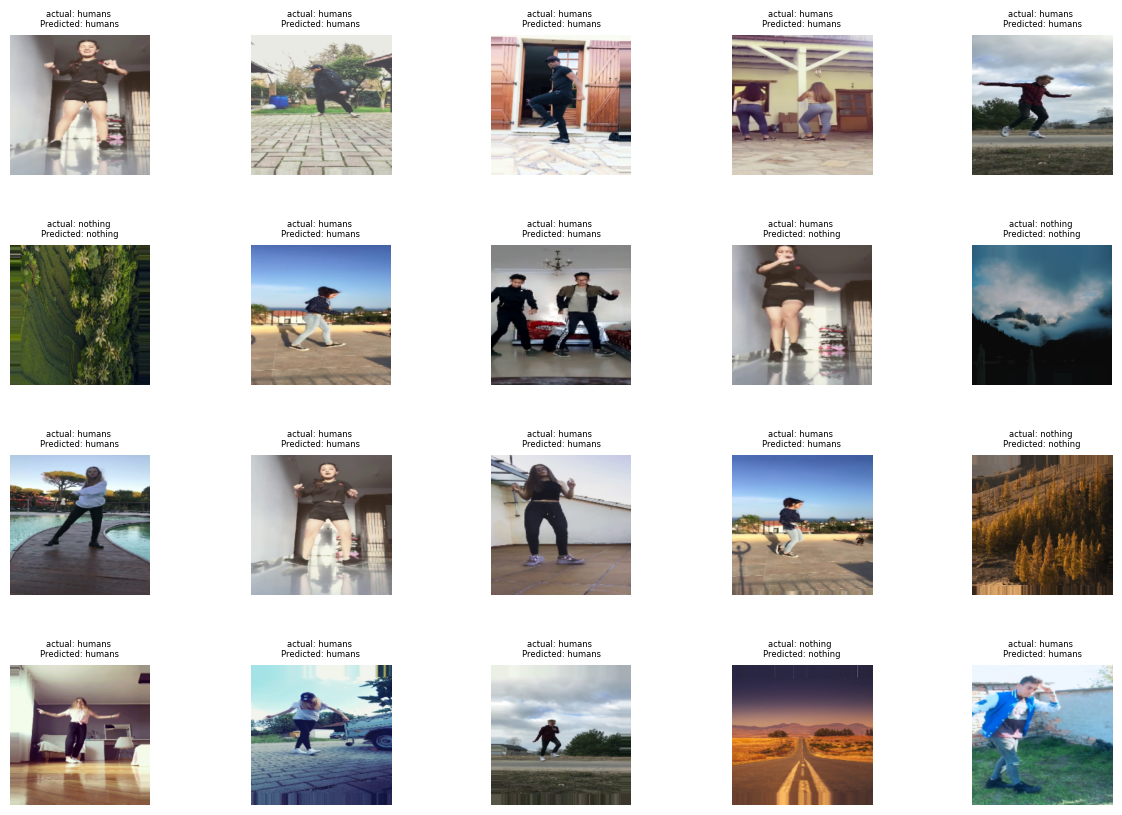

In [31]:
imagesToDisplay = 20

classes = list(trainData.class_indices.keys())

fig, axes = plt.subplots(4, 5, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, ax in enumerate (axes.flat):
    if i < imagesToDisplay:
        img, label = validData[i]

        image = img[0]

        ax.imshow(image)
        actualLabel = classes[int(label[0])]
        print(label[0])
        prediction = model.predict(np.expand_dims(image, axis = 0))
        predicted_class = (prediction > 0.5).astype(int)
        predictedLabel = classes[predicted_class[0][0]]
        
        ax.set_title(f'actual: {actualLabel} \nPredicted: {predictedLabel}', fontsize=6)
        ax.axis('off')

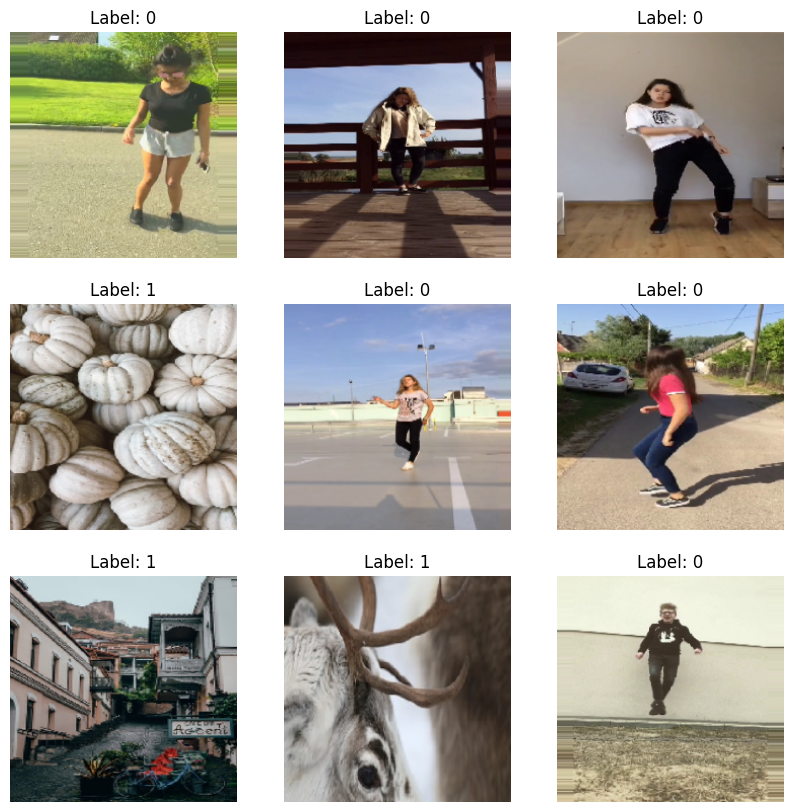

In [32]:
import matplotlib.pyplot as plt

# Get a batch of images and labels
images, labels = next(trainData)

# Plot the first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title('Label: %d' % labels[i])
    plt.axis('off')
plt.show()

In [33]:
model.save("C:/Users/aahfa/Documents/personalCode/python/ML_AI/ML_NerfGun/relevantModels/humanIdentifyV6.h5")